In [1]:
from utils import load_psf_and_image
from utils import plot_image
from utils import to_absolute_path

In [2]:
ORIGINAL_IMAGE = "data/lensed/im172.npy"
DIFFUSER_IMAGE = "data/diffuser/im172.npy"
PSF = "data/psf.tiff"

psf, image = load_psf_and_image(psf_fp=to_absolute_path(PSF),
                                data_fp=to_absolute_path(DIFFUSER_IMAGE),
                                downsample=4, flip=True, normalize=True)

psf.shape

(1, 270, 480, 3)

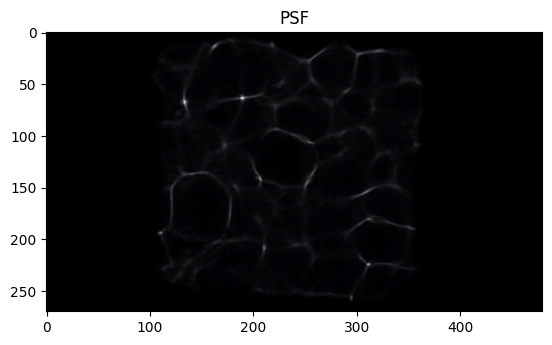

In [3]:
from matplotlib import pyplot as plt

# plt.imshow(psf[0])  # will show a black image, needs gamma correction
plot_image(psf[0])
plt.title("PSF")
plt.show()

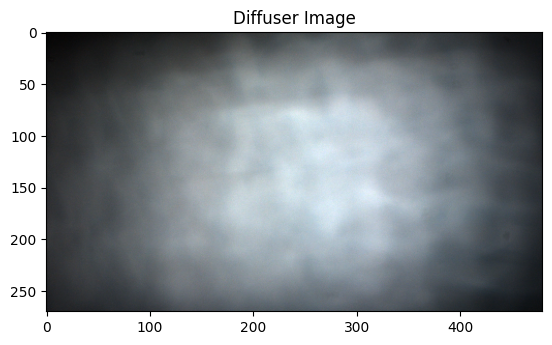

In [4]:
plot_image(image)
plt.title("Diffuser Image")
plt.show()

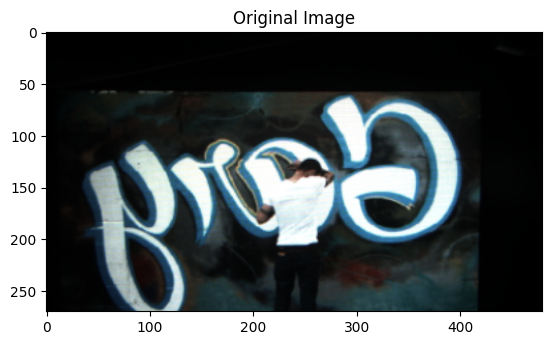

In [5]:
from utils import load_image

original = load_image(to_absolute_path(ORIGINAL_IMAGE))  #, shape=reconstructed.shape)
plot_image(original)
plt.title('Original Image')
plt.show()

/Users/ishapuri/Desktop/final_opt_project/lenseless_imaging/utils.py:145: RuntimeWarning: invalid value encountered in divide
  img_norm[i] = disp_img[i] / max_val[i]
/Users/ishapuri/Desktop/final_opt_project/lenseless_imaging/utils.py:147: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  _, ax = plt.subplots()
/Users/ishapuri/anaconda3/envs/opt_project/lib/python3.11/site-packages/matplotlib/cm.py:494: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


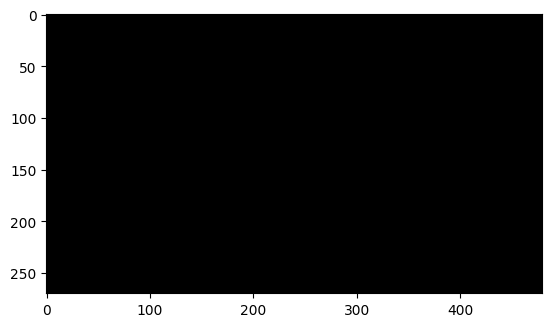

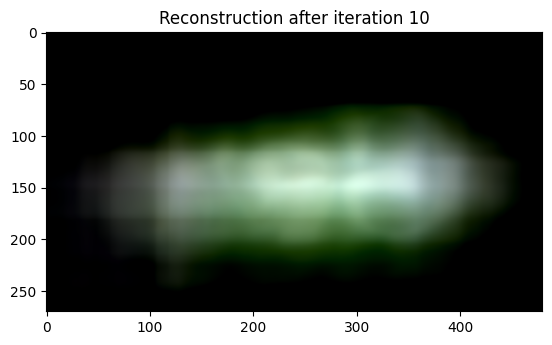

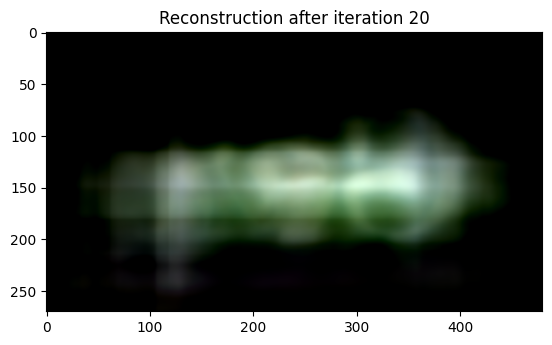

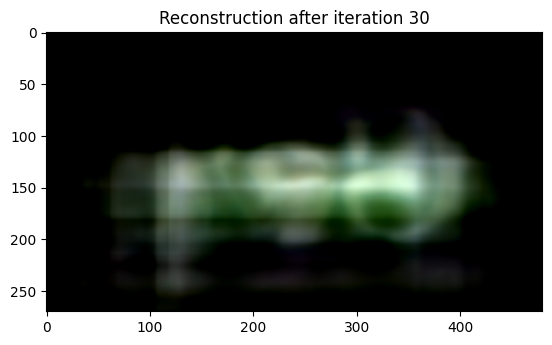

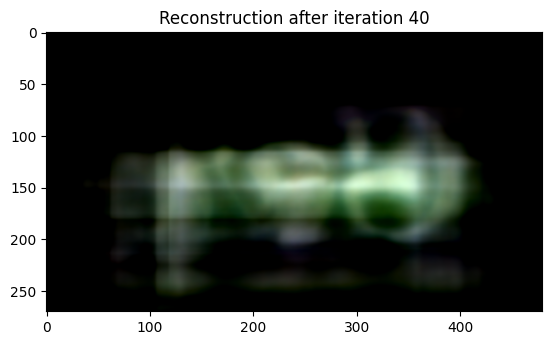

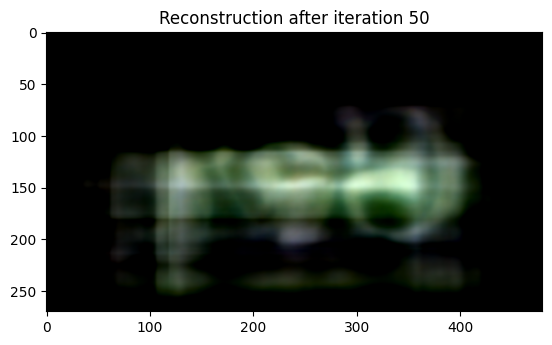

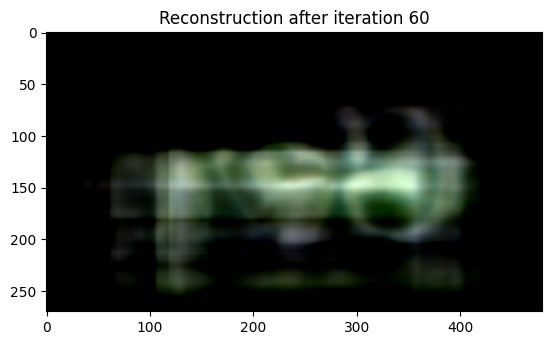

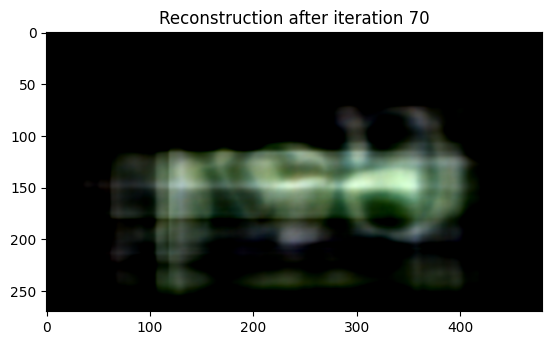

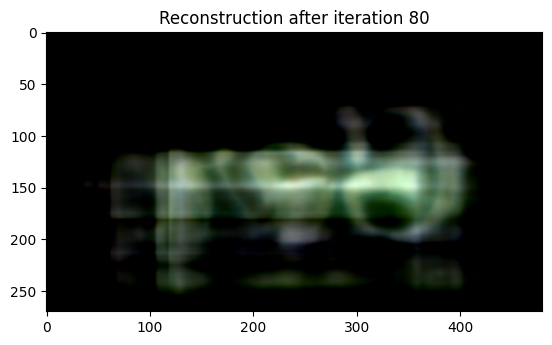

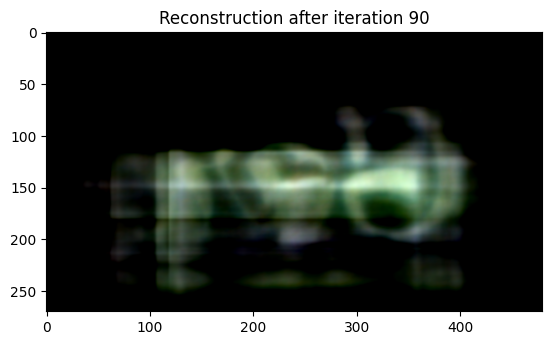

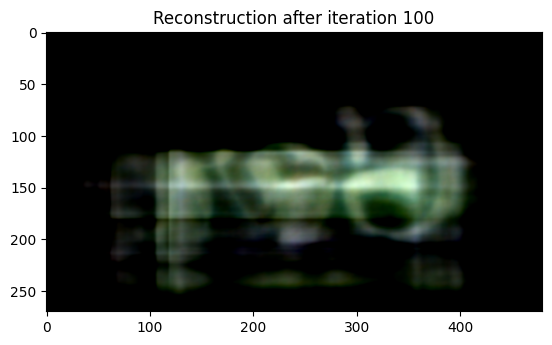

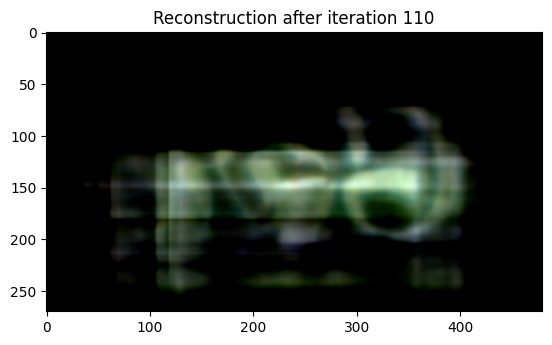

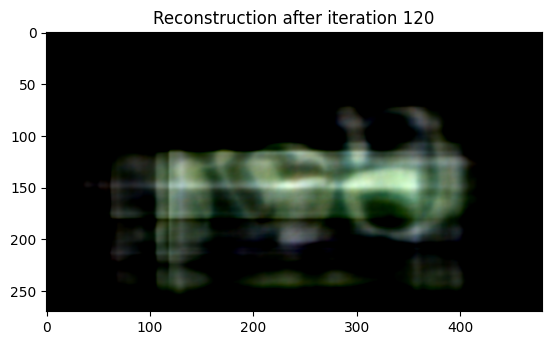

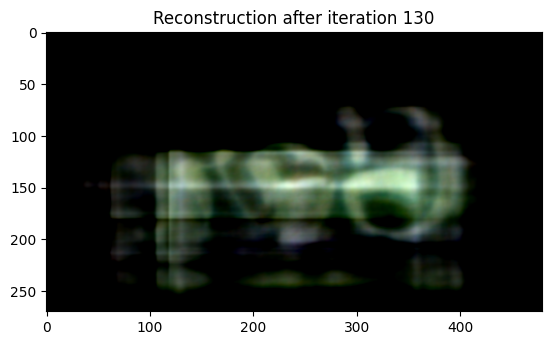

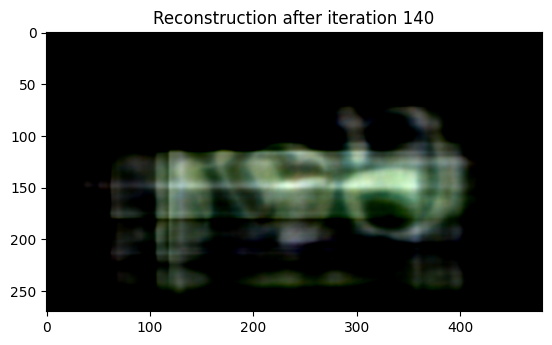

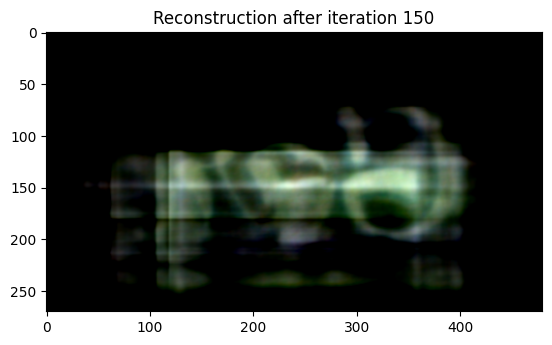

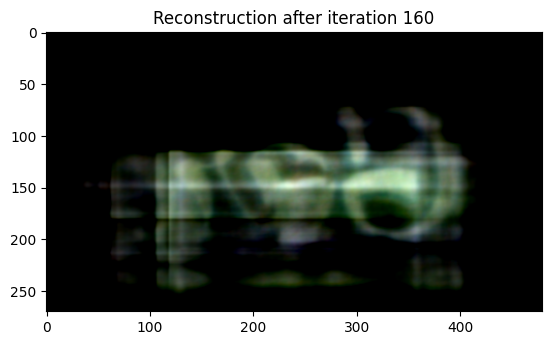

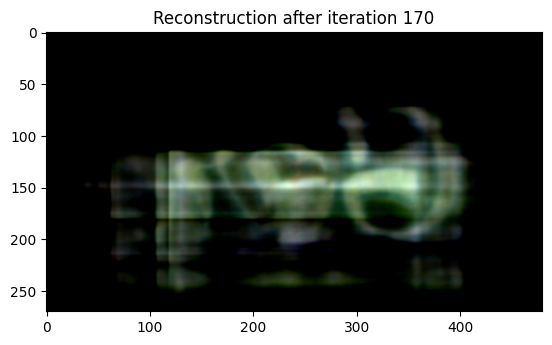

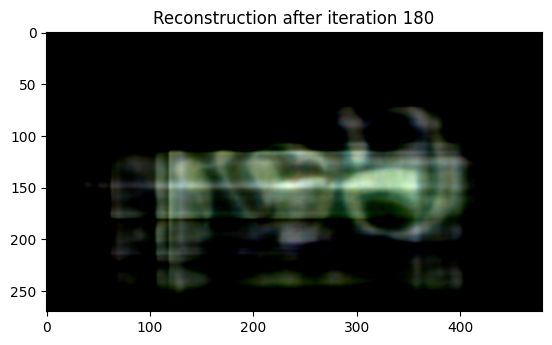

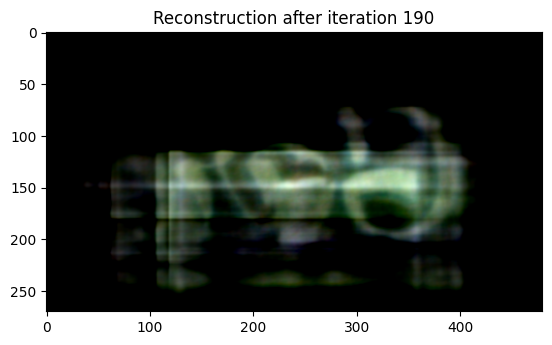

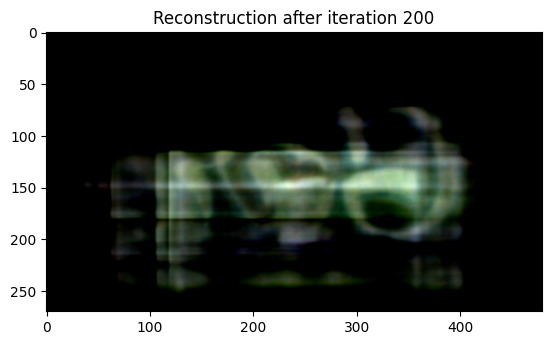

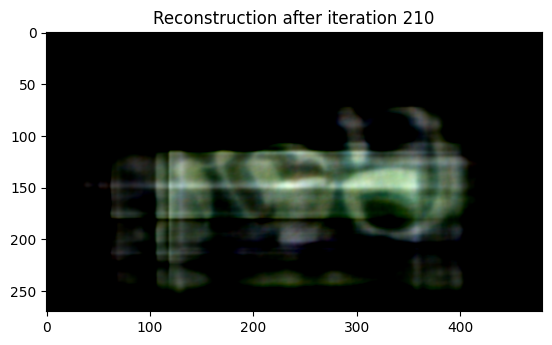

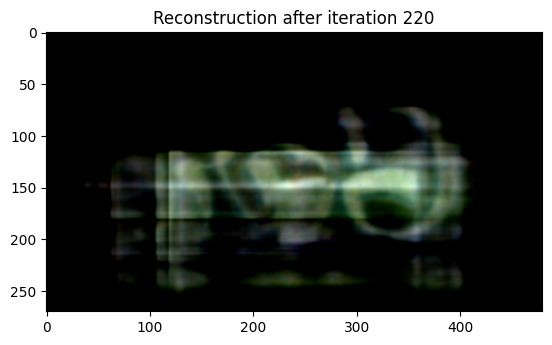

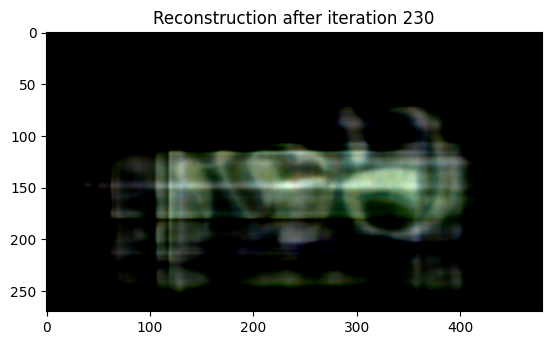

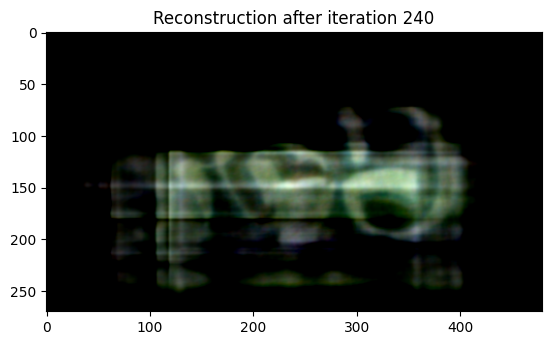

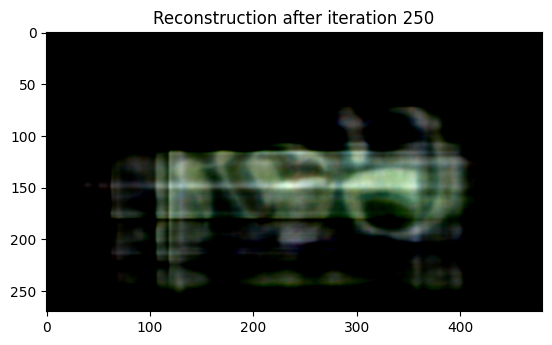

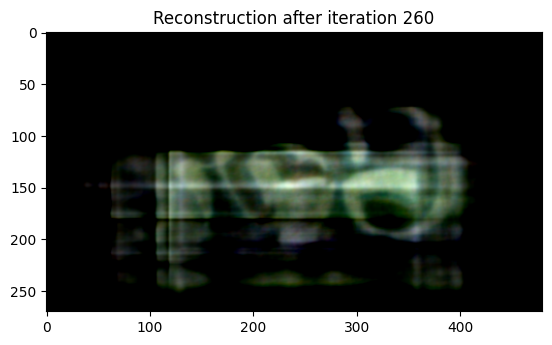

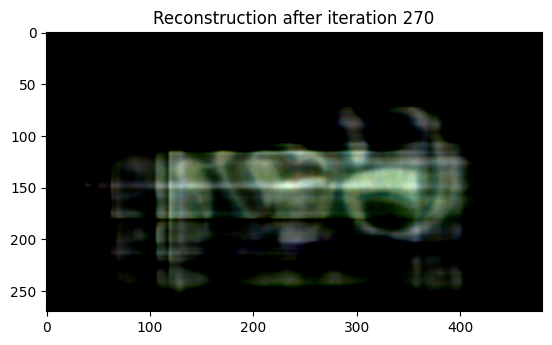

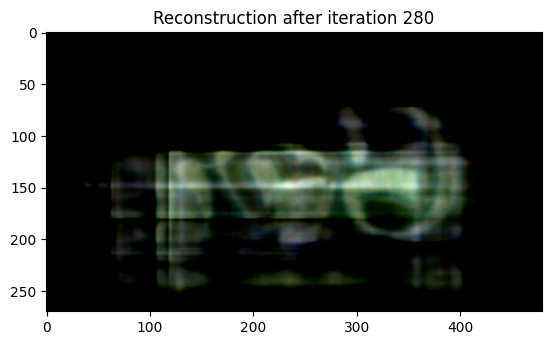

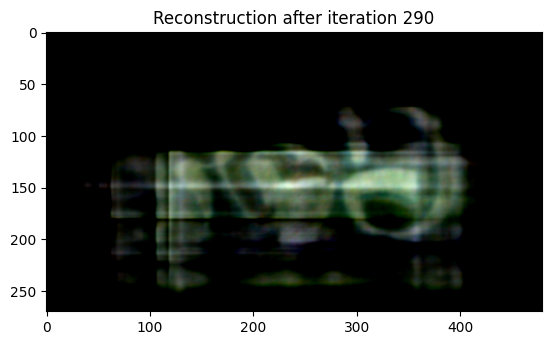

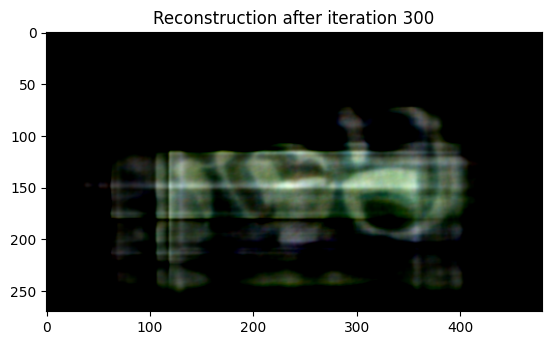

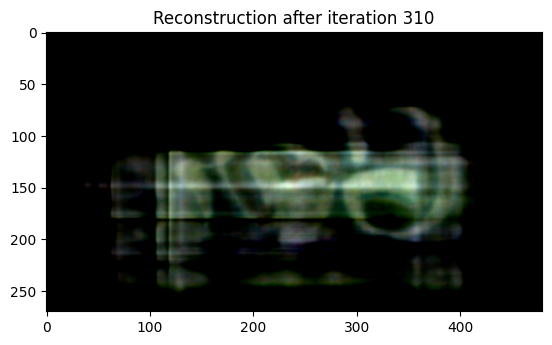

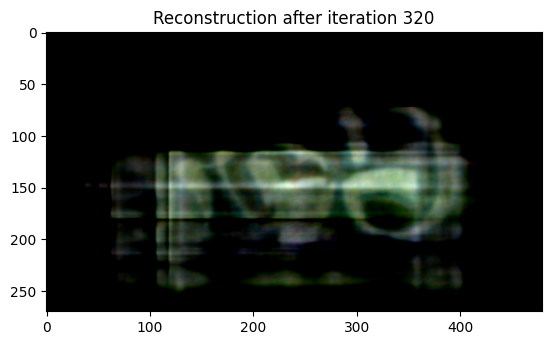

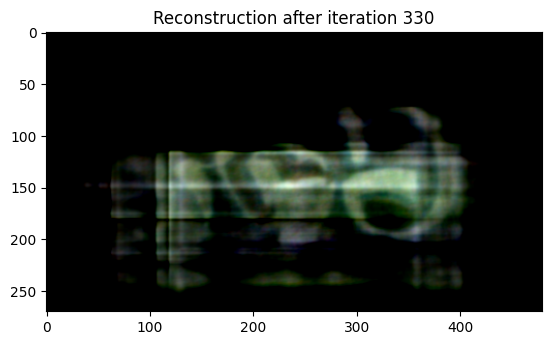

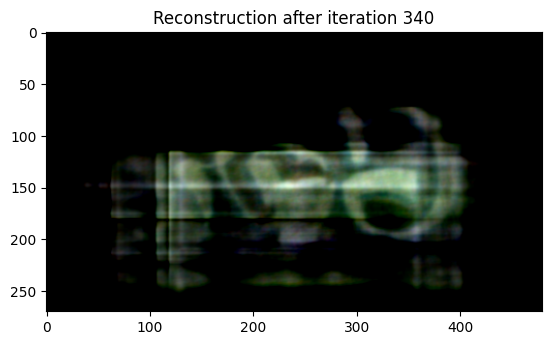

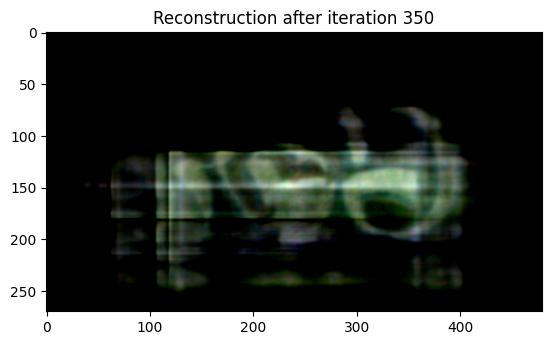

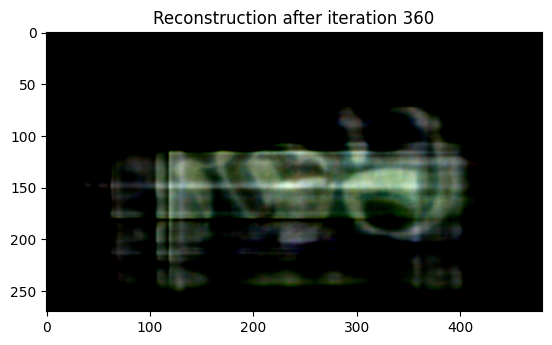

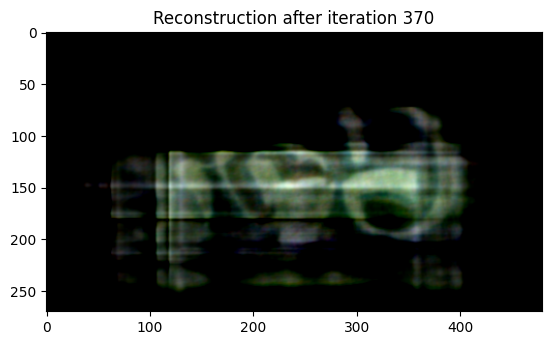

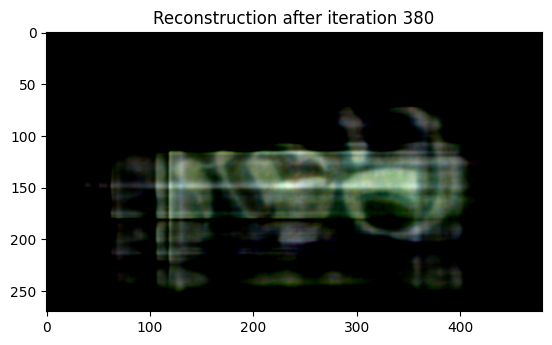

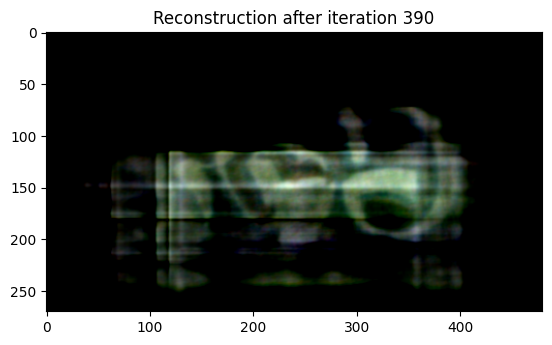

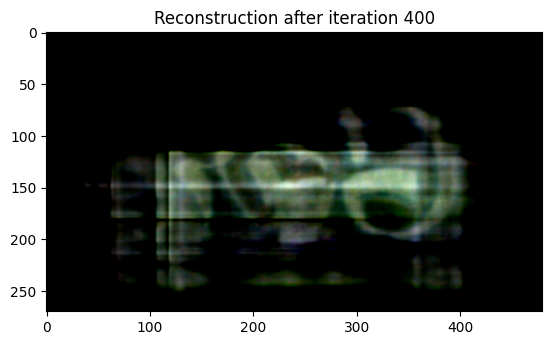

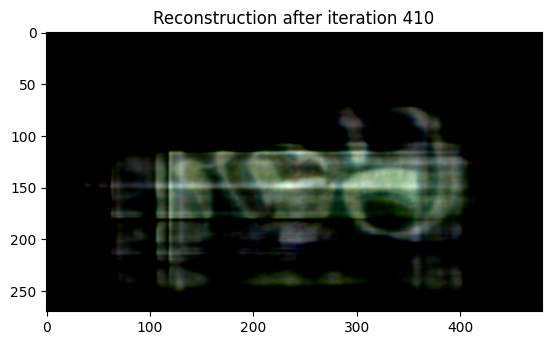

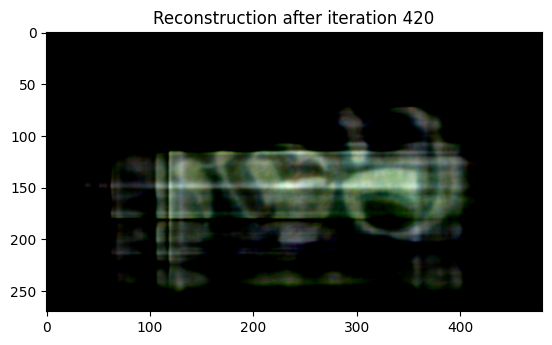

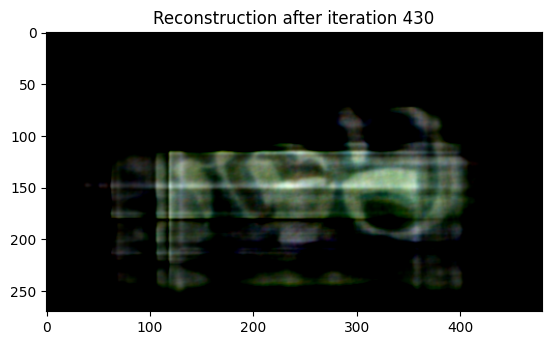

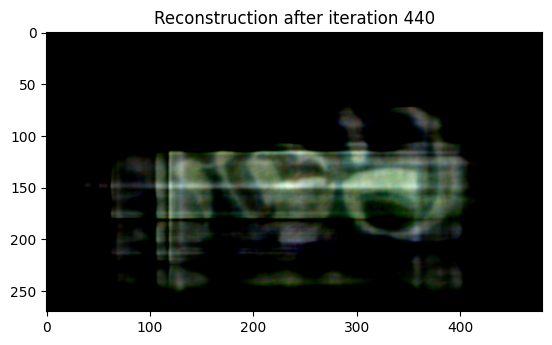

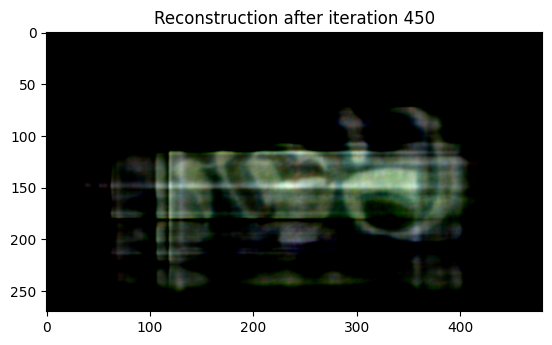

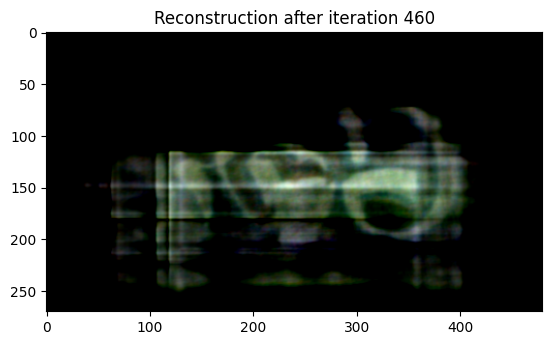

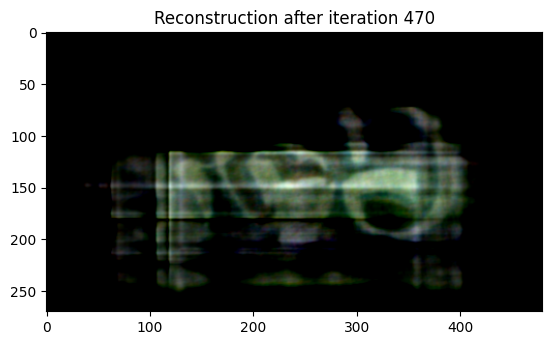

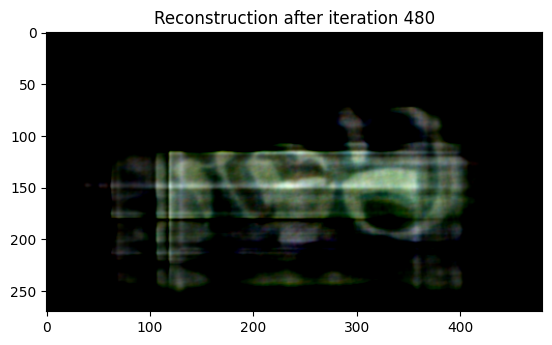

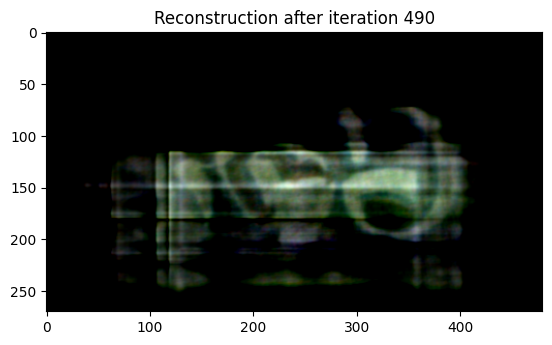

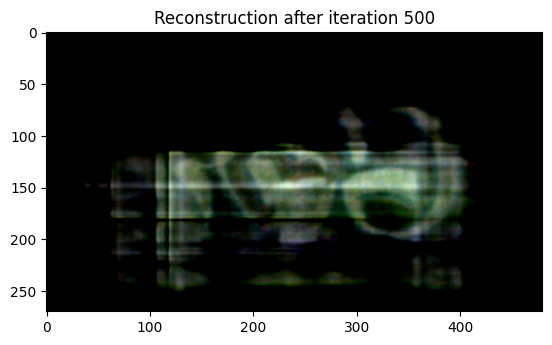

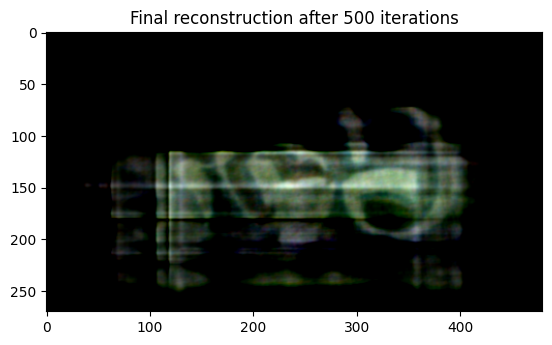

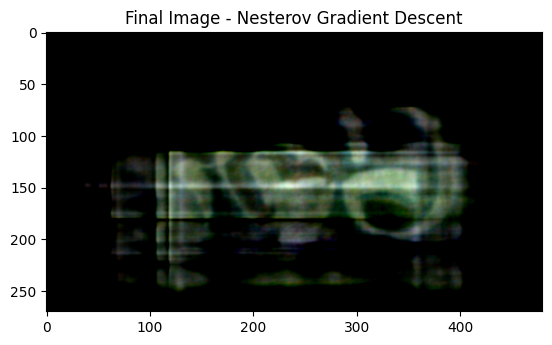

In [6]:
from algorithms.nesterov import nesterov_gradient_descent

reconstructor = nesterov_gradient_descent(psf)
reconstructed = reconstructor.apply(image, n_iter=500, disp_iter=10)
plot_image(reconstructed[0]).set_title("Final Image - Nesterov Gradient Descent")
plt.show()